In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#reading the xls file in python
df=pd.read_excel(r'C:\Users\perei\OneDrive\Desktop\Datasets-20211109\iris.xls')

In [3]:
#displaying first 10 rows of the dataframe
df.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#displaying last 10 rows of the dataframe
df.tail(10)

,SL,SW,PL,PW,Classification
140,6.7,3.1,5.6,2.4,Iris-virginica
141,NaN,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#displaying how many rows and columns the dataframe have
df.shape

(150, 5)

In [6]:
#getting the basic information on the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#checking for null values
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
#displaying the statistical summary of the data frame which has null values
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


since the mean and median of SL,SW,PL are close to one another we can replace the null values with either their mean or median.

In [9]:
for i in ['SL','SW','PL']:
    df[i]=df[i].fillna(df[i].median())  # filling the null values of SL,PL,SW eith their respective median values

In [10]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Checking for outliers in SL,SW,PL,PW

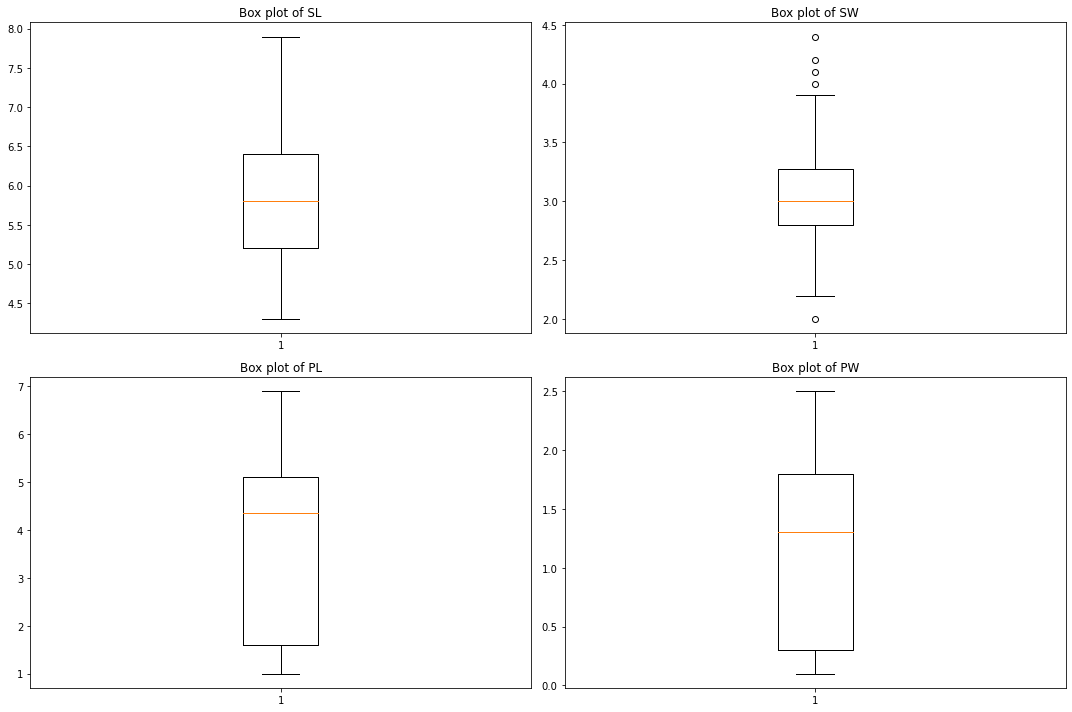

In [11]:
plt.figure(figsize = (15,10))

#boxplot for SL column
plt.subplot(2,2,1)
plt.boxplot(df['SL'])
plt.title('Box plot of SL')

#boxplot for SW column
plt.subplot(2,2,2)
plt.boxplot(df['SW'])
plt.title('Box plot of SW')

#boxplot for PL column
plt.subplot(2,2,3)
plt.boxplot(df['PL'])
plt.title('Box plot of PL')

#boxplot for PW column
plt.subplot(2,2,4)
plt.boxplot(df['PW'])
plt.title('Box plot of PW')

plt.tight_layout()
plt.show()

it can be seen that SL,PL,PW does not have outliers,but SW has some outliers at both the ends.

In [12]:
#sorting the data based on SW and trying to find out outliers
df.sort_values('SW',ascending=False)

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
...,...,...,...,...,...
93,5.0,2.3,3.3,1.0,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica


so here we find out that 4.0,4.1,4.2,4.4,2.0 are the outliers. Now let us find the inter quartile range and then determine what should we do with the outliers.

In [13]:
#finding the quartiles :first quartile and 3rd quartile
Q1=np.percentile(df['SW'],25)
Q3=np.percentile(df['SW'],75)
print ('Q1 =',Q1,'Q3 =',Q3)
#calculating the inter quartile range
IQR=Q3-Q1
print('IQR =',IQR)
#calculating the upper and lower limits
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('lower limit =',low_lim,'\n upper limit =',upper_lim)

Q1 = 2.8 Q3 = 3.2749999999999995
IQR = 0.47499999999999964
lower limit = 2.0875000000000004 
 upper limit = 3.987499999999999


so now we can see that the outliers are closer to the upper and lower limit, it would be best to do quantile based capping and flooring.

In [14]:
#capping/flooring the outlier at the upper and lower limits
df['SW'] = np.where(df['SW']>upper_lim,upper_lim,
                    np.where(df['SW']<low_lim,low_lim,df['SW']))
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


since machines cannot understand categorical values, we should convert them to numerical values.Here we use label encoding to convert them into numerical values

In [15]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
#importing necessary library and creating an instance of labelencoder

In [16]:
df['Classification']=enc.fit_transform(df['Classification']) #encoding the classification column

creating traing and testing set

In [17]:
X=df.drop('Classification',axis=1)
y=df['Classification']

In [18]:
#spliting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

# SVM

In [19]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf')

In [20]:
classifier.fit(X_train,y_train)

SVC()

In [21]:
y_pred=classifier.predict(X_test)

evaluating the model

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [23]:
print('accuracy score is ',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy score is  0.9736842105263158


array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

so by svm model we have an accuracy score of 97% which is pretty good and the confusion matrix shows only one wrong predicted value


# logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_predicted=logit_model.predict(X_test)

C:\Users\perei\anaconda3\envs\new1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print('accuracy score is ',accuracy_score(y_test,y_predicted))
confusion_matrix(y_test,y_predicted)

accuracy score is  0.9736842105263158


array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

here also we have an accuracy score of 97% and cofusion matrix shows only 1 error

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred1=dtc.predict(X_test)

In [28]:
print('accuracy score is ',accuracy_score(y_test,y_pred1))
confusion_matrix(y_test,y_pred1)

accuracy score is  1.0


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

so here we can see that our accuracy score is 100% and there is no error in predicted values as shown by the confusion matrix also. So clearly decision tree would be the best model to choose to predict values in this problem

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred2=rf.predict(X_test)

In [31]:
print('accuracy score is ',accuracy_score(y_test,y_pred2))
confusion_matrix(y_test,y_pred2)

accuracy score is  1.0


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

so here also  we can see that our accuracy score is 100% and there is no error in predicted values as shown by the confusion matrix also.

Therefore random forest and decision tree is the best model to use for this problem